In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/w7/q410jwws6dxg5ycnncr4755r0000gn/T/ipykernel_52308/2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [22]:
class Adaline:

    """
    Parameters
    --------------
    lr: float
        Learning rate
    epochs: int
        Number of iterations to train on the data
    random_state: int 
        Random number generator seed for random weight
        initialization

    Attributes
    --------------
    w_ : 1d-array
        weights
    b_ : Scalar 
        bias
    """
    def __init__(self, lr = 0.01, epochs = 50, random_state=1):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self, X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = 0.0
        self.losses_ = []
        for epoch in range(self.epochs):
            z = self.net_input(X)
            z = self.activation(z)
            error = (y - z)
            dlByDw =  - self.lr * (X.T.dot(error)) / X[0]
            dlBydB =  - self.lr * error.mean()
            self.w_ -= dlByDw
            self.b_ -= dlBydB
            loss = (error**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_)+ self.b_
    
    def activation(self, X):
        return X

    def predict(self,X):
        return np.where(self.net_input(X)>=0.0, 1,0)




        


In [23]:
# get the iris data from uci
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [24]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [25]:
df[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

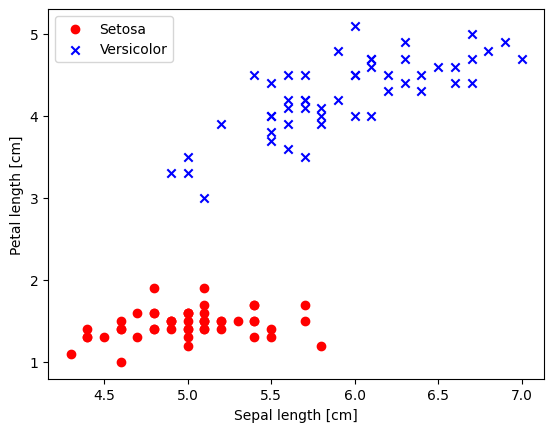

In [26]:
# extract only the setosa and versicolor  //the first 50 are setosa and next fifty are versiColor
y  = df.iloc[0:100, 4].values
y = np.where(y=="Iris-setosa", 0, 1)
X = df.iloc[0:100, [0,2]].values

#plot them
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:, 0], X[50:,1], color='blue', marker='x', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()


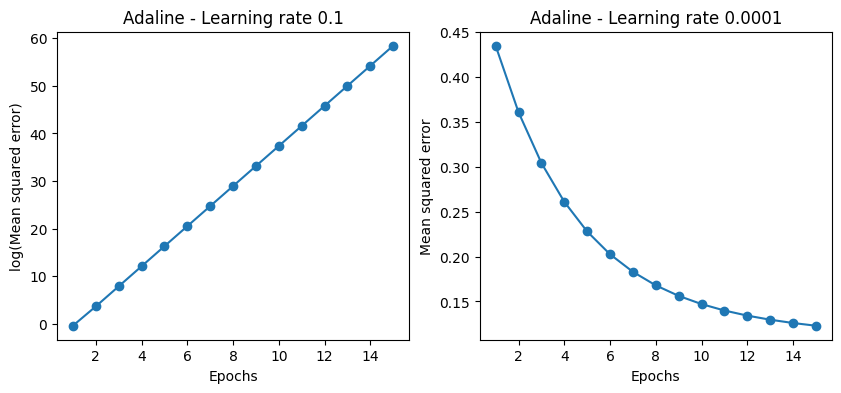

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 
ada1 = Adaline(epochs=15, lr=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1),
np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = Adaline(epochs=15, lr=0.0001).fit(X, y) 
ax[1].plot(range(1, len(ada2.losses_) + 1),
ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001') 
plt.show()

In [65]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

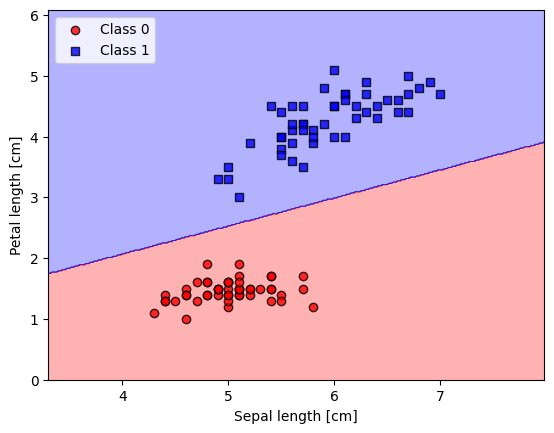

In [66]:
plot_decision_regions(X, y, classifier=pp)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()